<a href="https://colab.research.google.com/github/zghnjkt/kwonkt0317/blob/main/%EB%85%BC%ED%94%84_Smile_or_Not_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 자료는 https://www.kaggle.com/datasets/chazzer/smiling-or-not-face-data 에서 받았음.
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

'30801 권기태.mp4'                         'Colab Notebooks'/     Data/
 61C1E7E0-B2FB-4272-977E-D41BAE9BE267.png   ColabNotebooksdata/  '설명서(2).gdoc'


In [ ]:
cd Data

/content/drive/MyDrive/Data


In [ ]:
ls

non_smile/  smile/


Text(0.5, 1.0, 'smile')

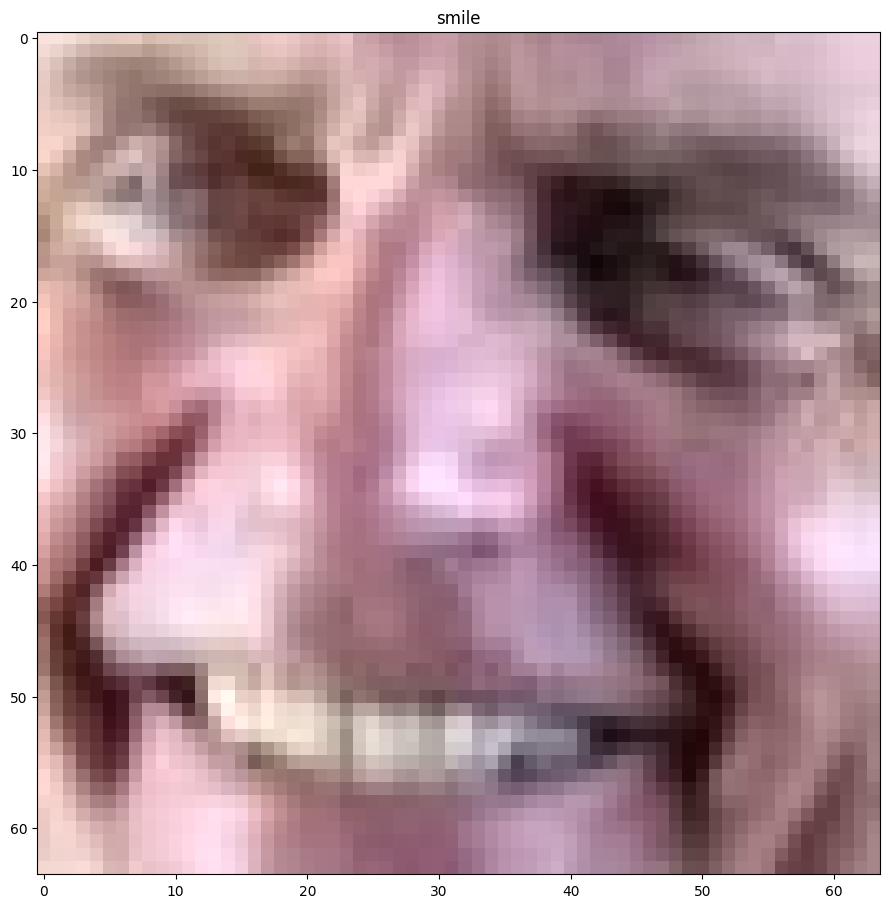

In [ ]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

### data/smile/ 폴더 안에 웃는 사람 그림을 확인해 봅니다.

image_sample= imread('smile/James_Jones_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('smile')
#ax.axis('off');

Text(0.5, 1.0, 'Non_smaile')

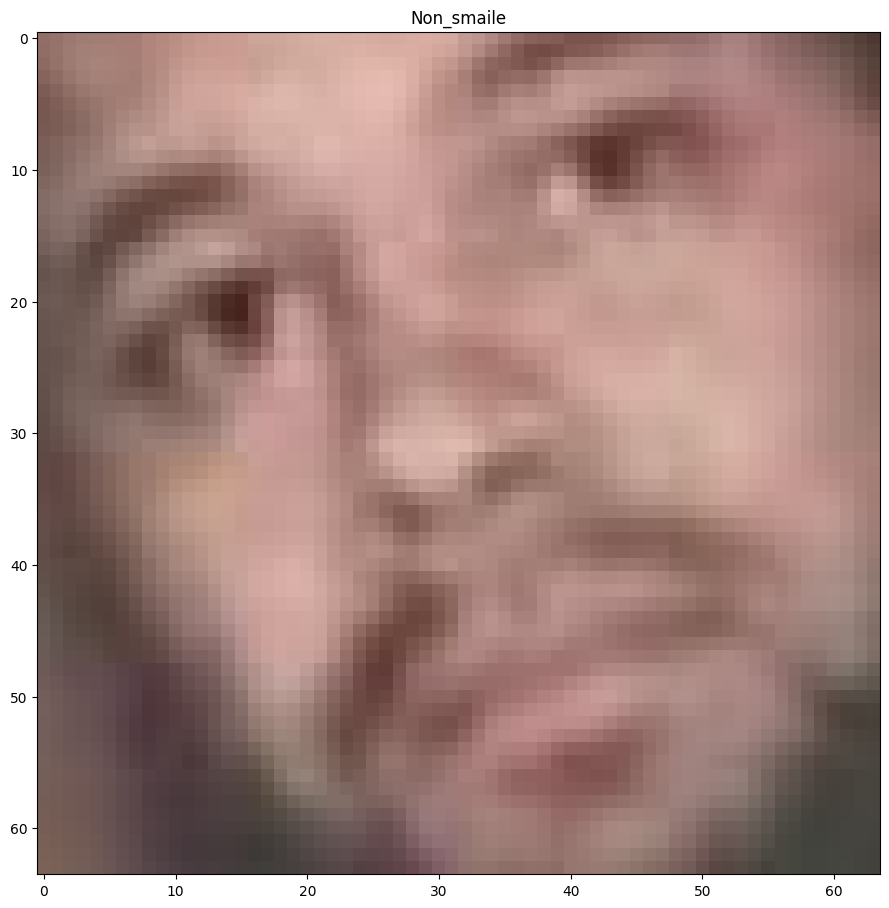

In [ ]:
###  non_smile/ 폴더 안에 안웃는 그림을 확인해 봅니다.

image_sample2= imread('non_smile/Aaron_Patterson_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample2, ax=ax)
ax.set_title('Non_smaile')


In [ ]:
image_sample.shape


(64, 64, 3)

In [ ]:
cd /

/


In [ ]:
# ImageDataGenerator의 flow_from_directory를 사용하여 directory로 데이터를 입력

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

### ImageDataGenerator는 픽셀의 컬러 혹은 흑백값을 0에서 255를 0과 1사이로 바꾸어 줍니다. 이것은 필수입니다.
### ImageDataGenerator는 여러가지 옵션으로 사진의 갯수를 늘릴 수 있습니다.


### 아래는 train data에게 적용되는 옵션입니다.

train_gen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환 ## 이것은 사실상 필수 사항입니다.
        rotation_range=40,      # 40도까지 회전
        width_shift_range=0.2,  # 20%까지 좌우 이동
        height_shift_range=0.2, # 20%까지 상하 이동
        shear_range=0.2,        # 20%까지 기울임
        zoom_range=0.2,         # 20%까지 확대
        horizontal_flip=True,   # 좌우 뒤집기
    )


### 이제 /content/drive/MyDrive/data/train에 두개의 폴더 adults/  children/에서 train data로 쓸 그림을 가지고 옵니다.
### 그리고 각각 폴더에서 온 것을 [1,0]과 [0,1]를 정답으로 해서 불러옵니다.
#### 아래는 validation_data에 사용할 data를 쓰는 것이라서 오직 크기를 변경하는 것만 하고, 다른 선택사항은 사용하지 않습니다.



test = train_gen.flow_from_directory(directory='/content/drive/MyDrive/Data/',
                                              target_size=(65, 65),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              color_mode='rgb',       # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                              class_mode='binary', # class_mode='binary', class_mode='categorical'
                                              batch_size=40,
                                              shuffle=True)


# 컨볼루션 신경망의 설정
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(65, 65, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
### [1,0]과 [0,1]이므로 위와 같이 했습니다.
### 만약 위에서 class_mode='binary'설정했다면, Dense(1,activation='sigmoid' )가 되여야 하고, 아래 compile을 loss=' binary_crossentropy'해야 합니다.

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.fit(test, epochs=5)

Found 1203 images belonging to 2 classes.
Epoch 1/5
31/31 [==============================] - 23s 717ms/step - loss: 1.1251 - accuracy: 0.5303
Epoch 2/5
31/31 [==============================] - 27s 873ms/step - loss: 0.6918 - accuracy: 0.5295
Epoch 3/5
31/31 [==============================] - 28s 887ms/step - loss: 0.6903 - accuracy: 0.5295
Epoch 4/5
31/31 [==============================] - 25s 771ms/step - loss: 0.6802 - accuracy: 0.5894
Epoch 5/5
31/31 [==============================] - 25s 792ms/step - loss: 0.6853 - accuracy: 0.5844
